In [1]:
import sys
#Rename according to your virtual - env name
sys.path.append('/usr/local/anaconda3/envs/cnn-reg/lib/python3.7/site-packages')

In [2]:
import matplotlib

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'1.15.0'

# Extracting VGG keypoints trial ( this part is not needed for mobilenet implementation)

In [6]:
from __future__ import print_function
import Registration
import matplotlib.pyplot as plt
from utils.utils import *
import cv2

# designate image path here
IX_path = '/Users/karthik/Downloads/g.jpeg'
IY_path = '/Users/karthik/Downloads/h.jpeg'

IX = cv2.imread(IX_path)
IY = cv2.imread(IY_path)

print(IX)

#initialize
from timeit import default_timer as timer
start = timer()
reg = Registration.CNN()
#register
X, Y, Z = reg.register(IX, IY)
#generate regsitered image using TPS
registered = tps_warp(Y, Z, IY, IX.shape)
cb = checkboard(IX, registered, 11)
end = timer()

print(end-start)

[[[ 65 129 123]
  [ 63 127 121]
  [ 61 125 120]
  ...
  [ 70 118 106]
  [ 75 124 116]
  [ 71 122 114]]

 [[ 75 142 135]
  [ 75 142 135]
  [ 73 139 134]
  ...
  [ 60 108  96]
  [ 62 112 102]
  [ 57 108 100]]

 [[ 81 151 144]
  [ 84 154 147]
  [ 87 154 149]
  ...
  [ 57 103  91]
  [ 56 106  96]
  [ 51 103  93]]

 ...

 [[193 181 171]
  [193 181 171]
  [192 180 170]
  ...
  [ 86 141 124]
  [ 92 147 130]
  [ 99 154 137]]

 [[191 181 171]
  [190 180 170]
  [189 179 169]
  ...
  [ 90 145 128]
  [ 95 153 135]
  [103 161 143]]

 [[189 180 170]
  [188 179 169]
  [188 178 168]
  ...
  [ 94 149 132]
  [ 98 156 138]
  [107 165 147]]]
/Users/karthik/mobilenet-reg/src/vgg16partial.npy

finish: itr 35, Q -1056, tau 1
137.819421007


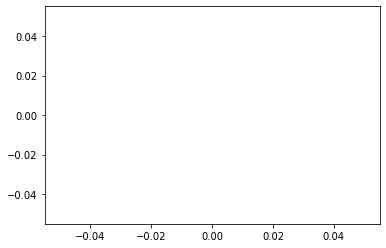

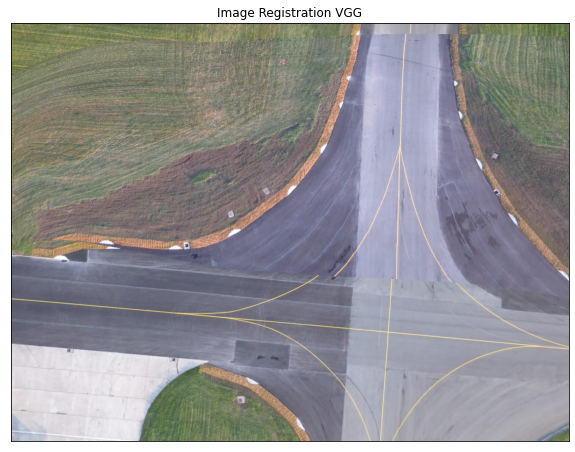

In [7]:
plt.plot()
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.title('Image Registration VGG')
plt.imshow(cv2.cvtColor(cb, cv2.COLOR_BGR2RGB))

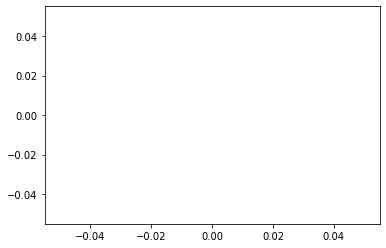

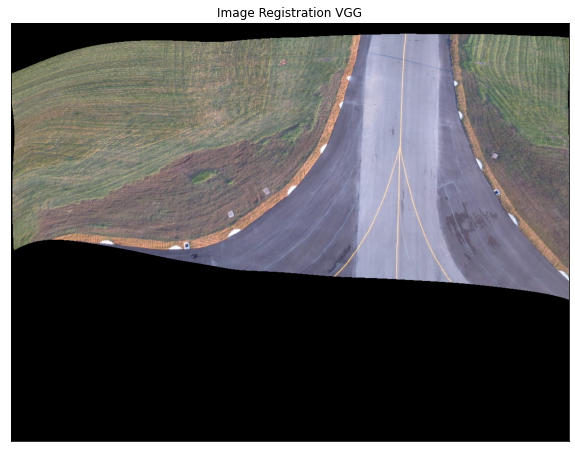

In [8]:
plt.plot()
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.title('Image Registration VGG')
plt.imshow(cv2.cvtColor(registered, cv2.COLOR_BGR2RGB))

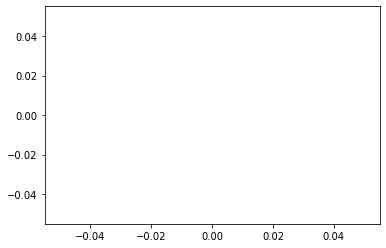

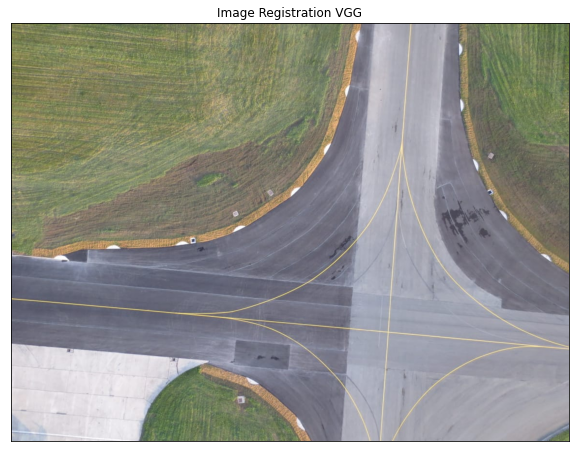

In [9]:
plt.plot()
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.title('Image Registration VGG')
plt.imshow(cv2.cvtColor(IX, cv2.COLOR_BGR2RGB))

In [8]:
cv2.imwrite('vgg.jpg', cv2.cvtColor(cb, cv2.COLOR_BGR2RGB))

True

In [ ]:
import Registration2

In [ ]:
A.shape

In [ ]:
F.shape

In [ ]:
reg.register(IX, IY)[2].shape

In [ ]:
IX.shape

In [ ]:
np.expand_dims(IX, axis=0).shape

In [ ]:
np.concatenate((np.expand_dims(IY, axis=0),np.expand_dims(IY, axis=0)),axis=0).shape

In [ ]:
reg.register(IX, IY)

In [ ]:
F.shape

In [ ]:
F[48]

In [ ]:
import cv2 as cv

In [ ]:
akaze = cv.AKAZE_create()
# Find the keypoints and descriptors with SIFT
kp1, des1 = akaze.detectAndCompute(IX, None)
kp2, des2 = akaze.detectAndCompute(IY, None)

In [ ]:
IX.shape

In [ ]:
type(kp1)

In [ ]:
des1.shape

In [ ]:
hello[0].shape

In [ ]:
hello[5].shape

In [ ]:
bf = cv.BFMatcher()
matches = bf.knnMatch(hello[4], hello[5], k=2)

In [ ]:
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append([m])

In [ ]:
img3 = cv.drawMatchesKnn(IX,kp1,IY,kp2,good_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv.imwrite('matches.jpg', img3)

In [ ]:
plt.imshow(img3)

# Mobilenet Implementation with keras

In [5]:
#import libraries)
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [6]:
tf.__version__

'2.4.1'

## Preprocessing

In [7]:
import keras

In [8]:
from PIL import Image, ImageDraw

In [9]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = '/Users/karthik/Downloads/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [10]:
preprocessed_image = prepare_image('g.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03788365', 'mosquito_net', 0.22788794),
  ('n04532670', 'viaduct', 0.1438762),
  ('n02795169', 'barrel', 0.1021792),
  ('n03160309', 'dam', 0.051732883),
  ('n03249569', 'drum', 0.049637094)]]

In [11]:
img_path = '/Users/karthik/Downloads/'
img = image.load_img(img_path + 'g.jpeg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)

In [12]:
img_array.shape

(224, 224, 3)

In [13]:
img_array_expanded_dims.shape

(1, 224, 224, 3)

In [14]:
img_array.shape

(224, 224, 3)

In [15]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [16]:
get_layer_output_1= K.function([mobile.layers[0].input],
                                  [mobile.get_layer('conv_pw_5').output])
get_layer_output_2= K.function([mobile.layers[0].input],
                                  [mobile.get_layer('conv_pw_10').output])
get_layer_output_3= K.function([mobile.layers[0].input],
                                  [mobile.get_layer('conv_pw_12').output])
get_layer_output_4= K.function([mobile.layers[0].input],
                                  [mobile.get_layer('conv_pw_1').output])
get_layer_output_5= K.function([mobile.layers[0].input],
                                  [mobile.get_layer('conv_pw_2').output])
get_layer_output_6= K.function([mobile.layers[0].input],
                                  [mobile.get_layer('conv_pw_4').output])

In [17]:
layer_output1 = (get_layer_output_3(preprocessed_image))[0]

In [18]:
layer_output1.shape

(1, 7, 7, 1024)

In [19]:
np.array(layer_output1).shape

(1, 7, 7, 1024)

In [20]:
hello=np.reshape(layer_output1[0], [-1, 256])/np.std(np.reshape(layer_output1[0], [-1, 256]))

In [21]:
hello.shape

(196, 256)

In [22]:
def ret_descriptors(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    preprocessed_image = keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
    predictions = mobile.predict(preprocessed_image)
    results = imagenet_utils.decode_predictions(predictions)
    get_layer_output_1= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_1').output])
    get_layer_output_2= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_2').output])
    get_layer_output_3= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_3').output])
    get_layer_output_4= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_4').output])
    get_layer_output_5= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_5').output])
    get_layer_output_6= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_6').output])
    get_layer_output_7= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_7').output])
    get_layer_output_8= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_8').output])
    get_layer_output_9= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_9').output])
    get_layer_output_10= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_10').output])
    get_layer_output_11= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_11').output])
    get_layer_output_12= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_12').output])
    get_layer_output_13= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_13').output])
    layer_output1 = (get_layer_output_1(preprocessed_image))[0]
    layer_output2 = (get_layer_output_2(preprocessed_image))[0]
    layer_output3 = (get_layer_output_3(preprocessed_image))[0]
    layer_output4 = (get_layer_output_4(preprocessed_image))[0]
    layer_output5 = (get_layer_output_5(preprocessed_image))[0]
    layer_output6 = (get_layer_output_6(preprocessed_image))[0]
    layer_output7 = (get_layer_output_7(preprocessed_image))[0]
    layer_output8 = (get_layer_output_8(preprocessed_image))[0]
    layer_output9 = (get_layer_output_9(preprocessed_image))[0]
    layer_output10 = (get_layer_output_10(preprocessed_image))[0]
    layer_output11 = (get_layer_output_11(preprocessed_image))[0]
    layer_output12 = (get_layer_output_12(preprocessed_image))[0]
    layer_output13 = (get_layer_output_13(preprocessed_image))[0]
    return [np.reshape(layer_output1, [-1, 64])/np.std(np.reshape(layer_output1[0], [-1, 64])),np.reshape(layer_output2[0], [-1, 128])/np.std(np.reshape(layer_output2[0], [-1, 128])),np.reshape(layer_output3[0], [-1, 128])/np.std(np.reshape(layer_output3[0], [-1, 128])), np.reshape(layer_output4[0], [-1, 256])/np.std(np.reshape(layer_output4[0], [-1, 256])),np.reshape(layer_output5[0], [-1, 256])/np.std(np.reshape(layer_output5[0], [-1, 256])), np.reshape(layer_output6[0], [-1, 512])/np.std(np.reshape(layer_output6[0], [-1, 512])), np.reshape(layer_output7[0], [-1, 512])/np.std(np.reshape(layer_output7[0], [-1, 512])),np.reshape(layer_output8[0], [-1, 512])/np.std(np.reshape(layer_output8[0], [-1, 512])), np.reshape(layer_output9[0], [-1, 512])/np.std(np.reshape(layer_output9[0], [-1, 512])), np.reshape(layer_output10[0], [-1, 512])/np.std(np.reshape(layer_output10[0], [-1, 512])), np.reshape(layer_output11[0], [-1, 512])/np.std(np.reshape(layer_output11[0], [-1, 512])), np.reshape(layer_output12[0], [-1, 1024])/np.std(np.reshape(layer_output12[0], [-1, 1024])), np.reshape(layer_output13[0], [-1, 1024])/np.std(np.reshape(layer_output13[0], [-1, 1024]))]

In [23]:
get_layer_output_5= K.function([mobile.layers[0].input],[mobile.get_layer('conv_pw_1').output])
layer_output5 = (get_layer_output_5(preprocessed_image))[0]

In [24]:
layer_output5.shape

(1, 112, 112, 64)

In [25]:
hello=np.reshape(layer_output5[0], [-1, 256])/np.std(np.reshape(layer_output5[0], [-1, 256]))

In [26]:
hello.shape

(3136, 256)

In [27]:
import numpy as np

In [35]:
np.array(ret_descriptors("g.jpeg")).shape

FileNotFoundError: [Errno 2] No such file or directory: 'g.jpeg'

In [28]:
seq = np.array([[i, j] for i in range(28) for j in range(28)], dtype='int32')

In [29]:
ret_descriptors("g.jpeg")

FileNotFoundError: [Errno 2] No such file or directory: 'g.jpeg'

In [28]:
from __future__ import print_function
import time
import gc
from utils.utils import *
import cv2
from utils.shape_context import ShapeContext
import matplotlib.pyplot as plt

In [29]:
from lap import lapjv

In [30]:
[D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13]=ret_descriptors("g.jpeg")
[F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13]=ret_descriptors("h.jpeg")

FileNotFoundError: [Errno 2] No such file or directory: 'g.jpeg'

In [31]:
D3.shape

NameError: name 'D3' is not defined

In [30]:
import math

In [32]:
print(D1.shape)
print(D2.shape)
print(D3.shape)
print(D4.shape)
print(D5.shape)
print(D6.shape)
print(D7.shape)
print(D8.shape)
print(D9.shape)
print(D10.shape)
print(D11.shape)
print(D12.shape)
print(D13.shape)

NameError: name 'D1' is not defined

In [34]:
pairwise_distance(D4,F4).shape

NameError: name 'pairwise_distance' is not defined

In [31]:
def register(IX_name,IY_name):
    [D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13]=ret_descriptors(IX_name)
    [F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13]=ret_descriptors(IY_name)
    height = 224
    width = 224
    shape = np.array([224.0, 224.0])
    sift_weight = 2.0
    cnn_weight = 1.0
    max_itr = 200
    tolerance = 1e-2
    freq = 5 # k in the paper
    epsilon = 0.5
    omega = 0.5
    lambd = 0.5

    PD1=pairwise_distance(D5,F5)
    PD2=pairwise_distance(D4,F4)
    PD3=pd_expand(pairwise_distance(D6,F6),2)
    PD4=pd_expand(pairwise_distance(D7,F7),2)
    PD6=pd_expand(pairwise_distance(D8,F8),2)
    PD7=pd_expand(pairwise_distance(D9,F9),2)
    PD8=pd_expand(pairwise_distance(D10,F10),2)
    PD9=pd_expand(pairwise_distance(D11,F11),2)
    PD10=pd_expand(pairwise_distance(D12,F12),4)
    PD11=pd_expand(pairwise_distance(D13,F13),4)
    PD=PD1+PD7+PD8+PD10
    
    seq = np.array([[i, j] for i in range(28) for j in range(28)], dtype='int32')

    X = np.array(seq, dtype='float32') * 8.0 + 4.0
    Y = np.array(seq, dtype='float32') * 8.0 + 4.0

    # normalize
    X = (X - 112.0) / 224.0
    Y = (Y - 112.0) / 224.0

    # prematch and select points
    C_all, quality = match(PD)
    tau_max = np.max(quality)
    while np.where(quality >= tau_max)[0].shape[0] <= 128: tau_max -= 0.01

    C = C_all[np.where(quality >= tau_max)]
    cnt = C.shape[0]

    # select prematched feature points
    X, Y = X[C[:, 1]], Y[C[:, 0]]
    PD = PD[np.repeat(np.reshape(C[:, 1], [cnt, 1]), cnt, axis=1),
            np.repeat(np.reshape(C[:, 0], [1, cnt]), cnt, axis=0)]

    N = X.shape[0]
    M = X.shape[0]
    assert M == N

    # precalculation of feature match
    C_all, quality = match(PD)

    # compute \hat{\theta} and \delta
    tau_min = np.min(quality)
    tau_max = np.max(quality)
    while np.where(quality >= tau_max)[0].shape[0] <= 0.5 * cnt: tau_max -= 0.01
    tau = tau_max
    delta = (tau_max - tau_min) / 10.0

    SCX = ShapeContext().compute(X)

    # initialization
    Z = Y.copy()
    GRB = gaussian_radial_basis(Y, 2.0)
    A = np.zeros([M, 2])
    sigma2 = init_sigma2(X, Y)

    Pr = None

    Q = 0
    dQ = float('Inf')
    itr = 1

    # registration process
    while itr < max_itr and abs(dQ) > tolerance and sigma2 > 1e-4:
        Z_old = Z.copy()
        Q_old = Q

        # for every k iterations
        if (itr - 1) % freq == 0:
            # compute C^{conv}_{\theta}
            C = C_all[np.where(quality >= tau)]
            Lt = PD[C[:, 0], C[:, 1]]
            maxLt = np.max(Lt)
            if maxLt > 0: Lt = Lt / maxLt
            L = np.ones([M, N])
            L[C[:, 0], C[:, 1]] = Lt

            # compute C^{geo}_{\theta}
            SCZ = ShapeContext().compute(Z)
            SC_cost = ShapeContext().cost(SCZ, SCX)

            # compute C
            L = L * SC_cost

            # linear assignment
            C = lapjv(L)[1]

            # prior probability matrix
            Pr = np.ones_like(PD) * (1.0 - epsilon) / N
            Pr[np.arange(C.shape[0]), C] = 1.0
            Pr = Pr / np.sum(Pr, axis=0)

            tau = tau - delta
            if tau < tau_min: tau = tau_min

        # compute minimization
        Po, P1, Np, tmp, Q = compute(X, Y, Z_old, Pr, sigma2, omega)
        Q = Q + lambd / 2 * np.trace(np.dot(np.dot(A.transpose(), GRB), A))

        # update variables
        dP = np.diag(P1)
        t1 = np.dot(dP, GRB) + lambd * sigma2 * np.eye(M)
        t2 = np.dot(Po, X) - np.dot(dP, Y)
        A = np.dot(np.linalg.inv(t1), t2)
        sigma2 = tmp / (2.0 * Np)
        omega = 1 - (Np / N)
        if omega > 0.99: omega = 0.99
        if omega < 0.01: omega = 0.01
        Z = Y + np.dot(GRB, A)
        lambd = lambd * 0.95
        if lambd < 0.1: lambd = 0.1

        dQ = Q - Q_old
        itr = itr + 1

    print('finish: itr %d, Q %d, tau %d' % (itr, Q, tau))
    Xscale = 1.0 * np.array(IX.shape[:2]) / shape
    Yscale = 1.0 * np.array(IY.shape[:2]) / shape
    return(((X*224.0)+112.0)*Xscale, ((Y*224.0)+112.0)*Yscale, ((Z*224.0)+112.0)*Xscale)


In [37]:
IX_path = '/Users/karthik/Downloads/g.jpeg'
IY_path = '/Users/karthik/Downloads/h.jpeg'

IX = cv2.imread(IX_path)
IY = cv2.imread(IY_path)

In [38]:
import cv2 as cv

In [40]:
from timeit import default_timer as timer
start = timer()
X, Y, Z = register(IX_path,IY_path)
#generate regsitered image using TPS
registered = tps_warp(Y, Z, IY, IX.shape)
cb = checkboard(IX, registered)
end=timer()
print(end-start)


'''plt.subplot(131)
plt.title('reference')
plt.imshow(cv.cvtColor(IX, cv.COLOR_BGR2RGB))
plt.subplot(132)
plt.title('registered')
plt.imshow(cv.cvtColor(registered, cv.COLOR_BGR2RGB))
plt.subplot(133)
plt.title('checkboard')
plt.imshow(cv.cvtColor(cb, cv.COLOR_BGR2RGB))
plt.show() '''

finish: itr 35, Q -896, tau 1
41.79297104700001


"plt.subplot(131)\nplt.title('reference')\nplt.imshow(cv.cvtColor(IX, cv.COLOR_BGR2RGB))\nplt.subplot(132)\nplt.title('registered')\nplt.imshow(cv.cvtColor(registered, cv.COLOR_BGR2RGB))\nplt.subplot(133)\nplt.title('checkboard')\nplt.imshow(cv.cvtColor(cb, cv.COLOR_BGR2RGB))\nplt.show() "

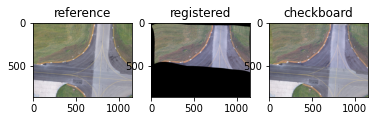

In [42]:
plt.subplot(131)
plt.title('reference')
plt.imshow(cv.cvtColor(IX, cv.COLOR_BGR2RGB))
plt.subplot(132)
plt.title('registered')
plt.imshow(cv.cvtColor(registered, cv.COLOR_BGR2RGB))
plt.subplot(133)
plt.title('checkboard')
plt.imshow(cv.cvtColor(cb, cv.COLOR_BGR2RGB))
plt.show()

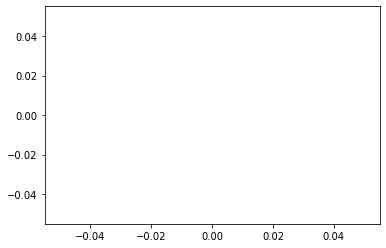

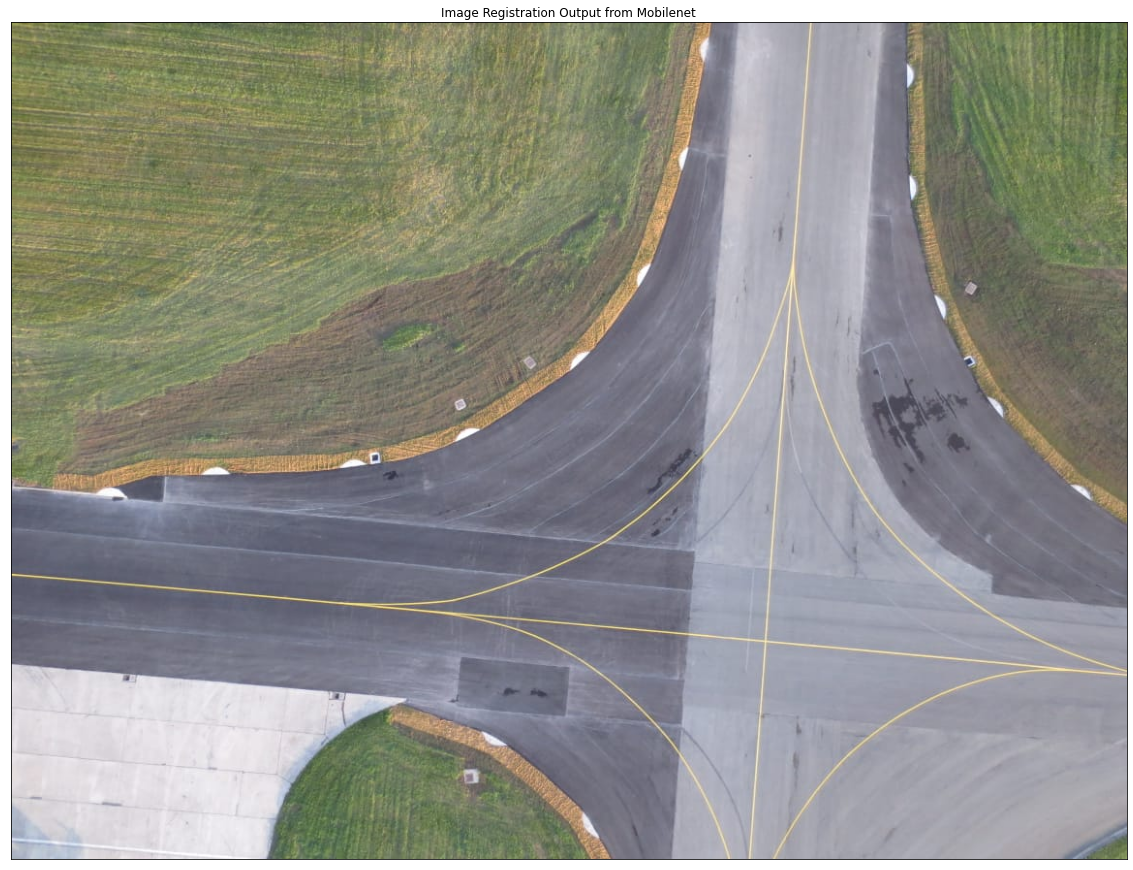

In [46]:
plt.plot()
plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])
plt.title('Image Registration Output from Mobilenet')
plt.imshow(cv.cvtColor(IX, cv.COLOR_BGR2RGB))
plt.show()

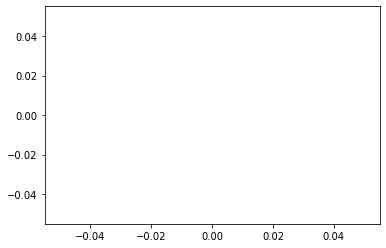

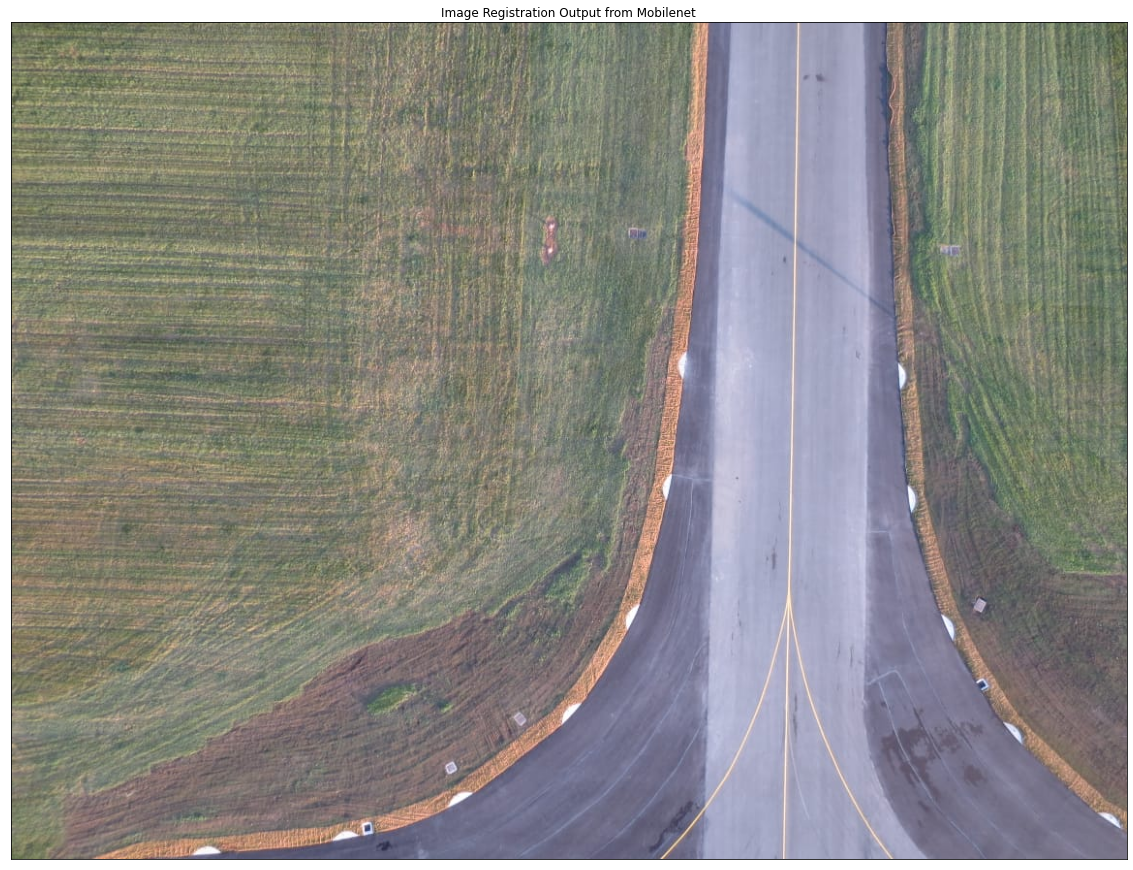

In [45]:
plt.plot()
plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])
plt.title('Image Registration Output from Mobilenet')
plt.imshow(cv.cvtColor(IY, cv.COLOR_BGR2RGB))
plt.show()

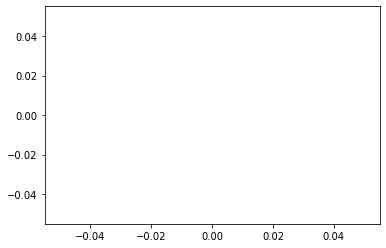

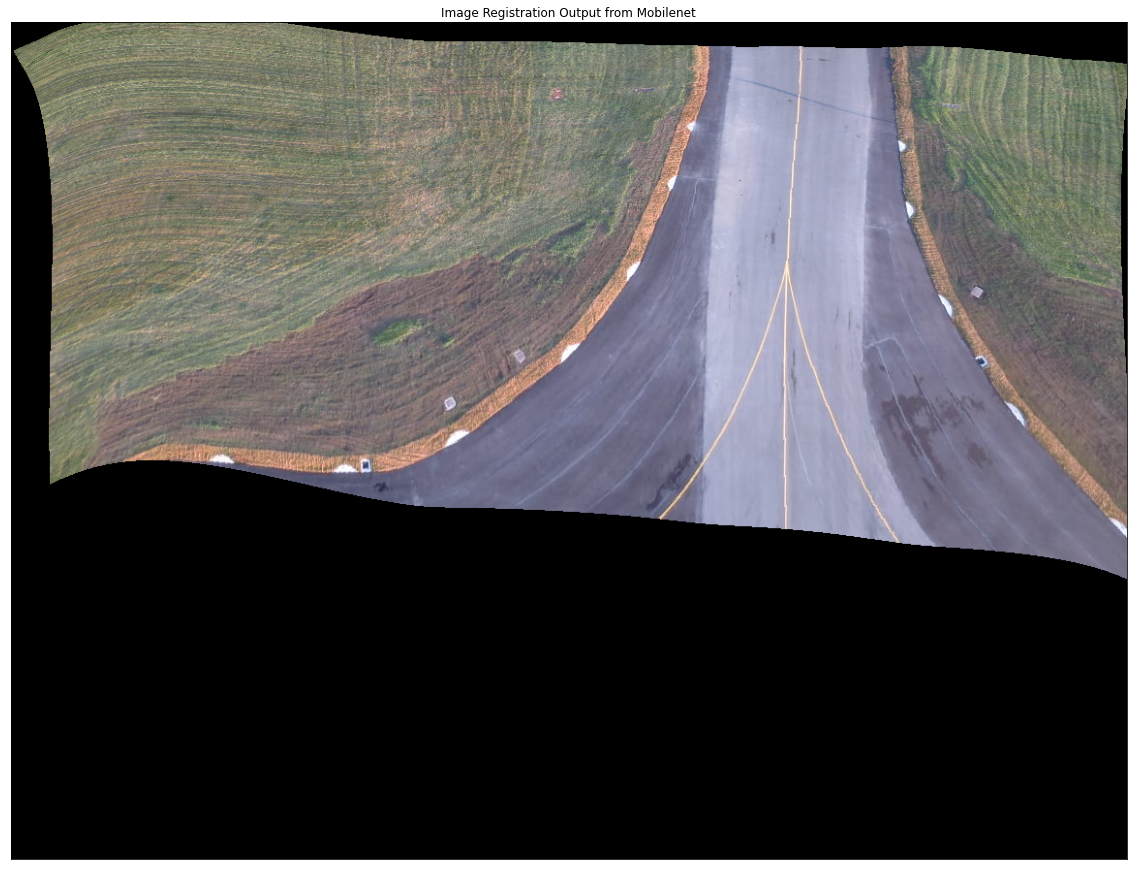

In [43]:
plt.plot()
plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])
plt.title('Image Registration Output from Mobilenet')
plt.imshow(cv.cvtColor(registered, cv.COLOR_BGR2RGB))
plt.show()

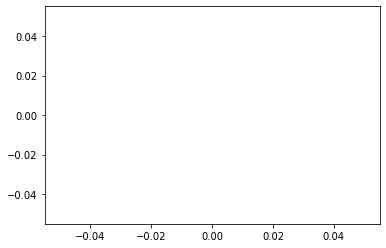

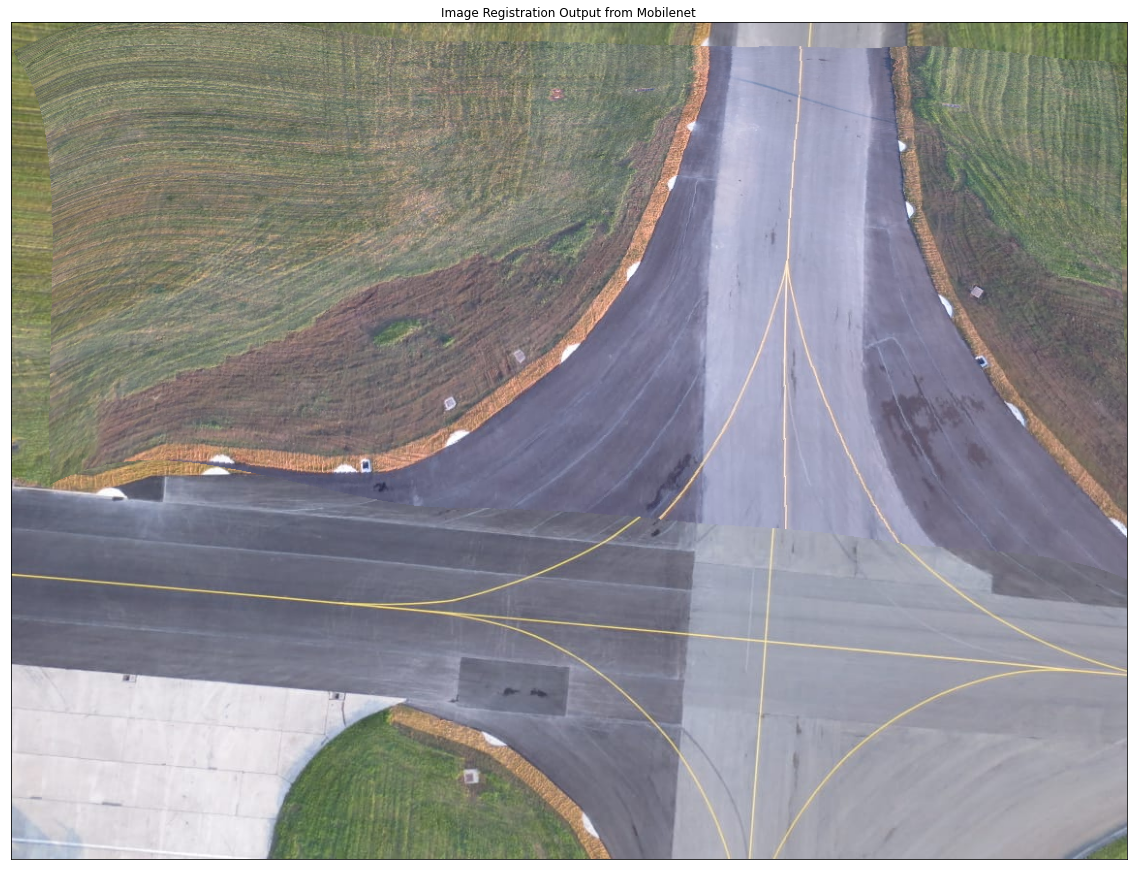

In [41]:
plt.plot()
plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])
plt.title('Image Registration Output from Mobilenet')
plt.imshow(cv.cvtColor(cb, cv.COLOR_BGR2RGB))
plt.show()

In [44]:
cv.imwrite('stitch_.jpg', cv.cvtColor(cb, cv.COLOR_BGR2RGB))

True

In [43]:
!pwd

/Users/karthik/mobilenet-reg/src


In [44]:
import pipreqs

In [45]:
!pwd

/Users/karthik/mobilenet-reg/src


In [46]:
!pip freeze > requirements.txt

In [47]:
from main import Laplacian_blending

In [50]:
Laplacian_blending(IX,IY,im_mask,levels=4)

IndexError: list index out of range

In [49]:
im_mask = np.full(IY.shape, 255, dtype = np.uint8)

In [ ]:
im_clone = cv.seamlessClone(im_dst, im_src, im_mask, center, cv.MIXED_CLONE)

In [54]:
import cv2
import numpy as np

def Laplacian_Pyramid_Blending_with_mask(A, B, m, num_levels = 6):
    # assume mask is float32 [0,1]

    # generate Gaussian pyramid for A,B and mask
    GA = A.copy()
    GB = B.copy()
    GM = m.copy()
    gpA = [GA]
    gpB = [GB]
    gpM = [GM]
    for i in range(num_levels):
        GA = cv2.pyrDown(GA)
        GB = cv2.pyrDown(GB)
        GM = cv2.pyrDown(GM)
        gpA.append(np.float32(GA))
        gpB.append(np.float32(GB))
        gpM.append(np.float32(GM))

    # generate Laplacian Pyramids for A,B and masks
    lpA  = [gpA[num_levels-1]] # the bottom of the Lap-pyr holds the last (smallest) Gauss level
    lpB  = [gpB[num_levels-1]]
    gpMr = [gpM[num_levels-1]]
    for i in range(num_levels-1,0,-1):
        # Laplacian: subtarct upscaled version of lower level from current level
        # to get the high frequencies
        LA = np.subtract(gpA[i-1], cv2.pyrUp(gpA[i]))
        LB = np.subtract(gpB[i-1], cv2.pyrUp(gpB[i]))
        lpA.append(LA)
        lpB.append(LB)
        gpMr.append(gpM[i-1]) # also reverse the masks

    # Now blend images according to mask in each level
    LS = []
    for la,lb,gm in zip(lpA,lpB,gpMr):
        ls = la * gm + lb * (1.0 - gm)
        LS.append(ls)

    # now reconstruct
    ls_ = LS[0]
    for i in range(1,num_levels):
        ls_ = cv2.pyrUp(ls_)
        ls_ = cv2.add(ls_, LS[i])

    return ls_



In [56]:
m = np.zeros_like(IX, dtype='float32')
m[:,int(IX.shape[1]/2):] = 1 # make the mask half-and-half
lpb = Laplacian_Pyramid_Blending_with_mask(IX, IY, cb, 5)
cv2.imwrite("lpb.png",lpb)

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-oe0iat4a/opencv/modules/core/src/arithm.cpp:693: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'arithm_op'
